# Kernel SVM

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
ds = pd.read_csv('Social_Network_Ads.csv')
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

## Training the Kernel SVM model on the Training set

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set results

In [17]:
claas = classifier.predict(X_test)
claas = np.reshape(claas,(len(claas), 1))

## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, claas)
print(cm)
print(accuracy_score(y_test, claas))

[[  0 201]
 [  0 119]]
0.371875


## Visualising the Training set results

C:\Users\Vrund\AppData\Local\Temp\ipykernel_11404\3927946696.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


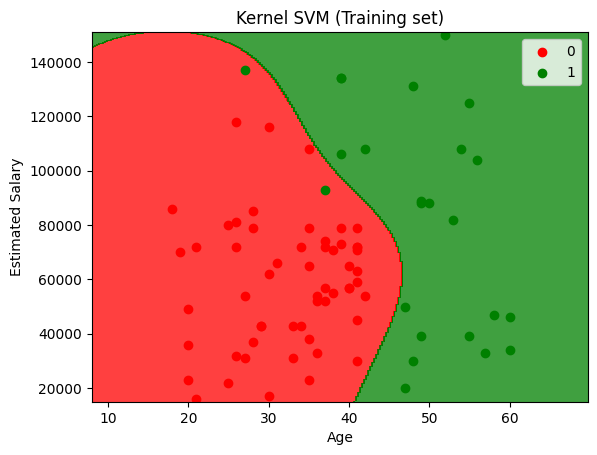

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc_X.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()